# The `plotting` Package

This package uses several other python packages to make it easy to visualise our brains.

Let's start by importing a brain:

In [2]:
from maybrain import constants as ct
from maybrain import brain as mbt
from maybrain import resources as rr
import matplotlib.pyplot as plt

a = mbt.Brain()
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)
a.apply_threshold()

## A general piece of advice

In the `plotting.histograms` and `plotting.matrices` modules, when you define the `output_file` argument in the functions, they will return None. So, when you don't define the `output_file` argument, all the plotting functions in these two modules return a pair with the `matplotlib.figure.Figure` object and the Axes object. In the next examples you will see that we will get the `Figure` object so we close it.

## The `plotting.histograms` module

Maybrain makes it easy to plot some histograms by using the python package `Matplotlib`.

For example, with `plot_weight_distribution()` you can plot the distribution of the weights in the `Brain.G`'s edges. In case you want to pass some arguments to `hist()` (matplotlib's function used to plot the histogram under the hood), `plot_weight_distribution()` accepts any argument (`kwargs`) that will directly be passed to `hist()`.

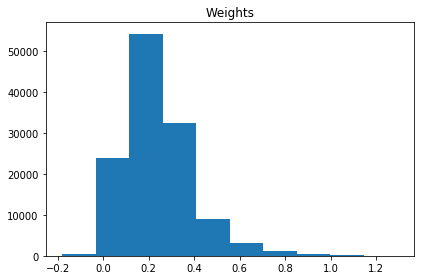

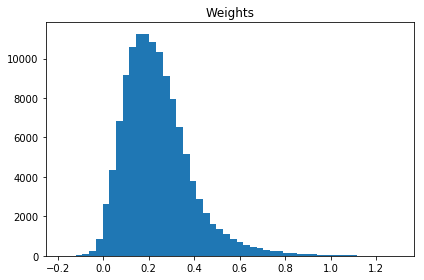

In [2]:
%matplotlib inline
from maybrain.plotting import histograms as hh

fig, _ = hh.plot_weight_distribution(a)
# You can define the number of bins, instead of using matplotlib automatic ones
fig2, _ = hh.plot_weight_distribution(a, bins=50)

In [3]:
# Closing them
plt.close(fig)
plt.close(fig2)

## The `plotting.matrices` module

When you have many brains, you can average all the `adjMat`s and have an averaged strength matrix. Maybrain can calculate and plot that matrix with the `plot_avg_matrix()` function. You just have to pass a dictionary with all the brains.

In our next example we will create a dictionary with just two repeated brains, which practically means nothing, but shows how the function works. The image is very small here in the notebook but if you choose to write the plot to a pdf file (eg. pass an argument `output_file="file.pdf"`), maybrain will create a pdf file and you can zoom it. You will thus be able to see that the image has the information of the anatomical labels of each node (on the top and on the left). These labels are ordered first by their hemisphere in the brain, then by the lobe and then by the anatomical label. If you want, you have parameters to set up a matrix for brains with a size different of 500x500.

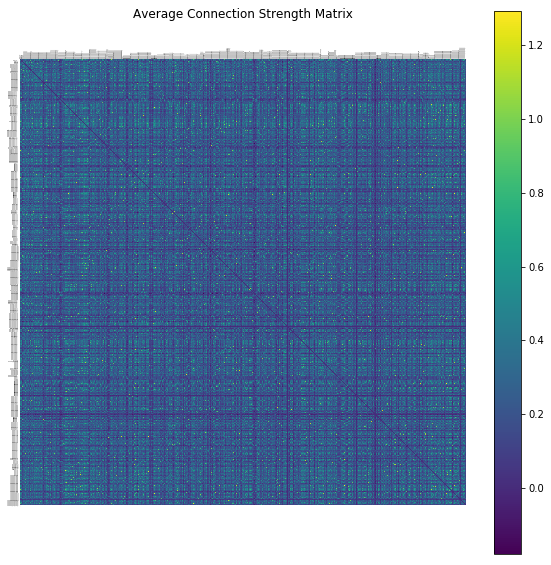

In [4]:
%matplotlib inline
from maybrain.plotting import matrices as mm

# Simple dictionary
dictionary = {0: a, 1: a}

fig, _ = mm.plot_avg_matrix(dictionary)

In [5]:
# Closing
plt.close(fig)

You also have the option to plot the `adjMat` of a single brain, with the function `plot_strength_matrix()`. The parameters you can pass to this function are similar to the previous one, with the difference that you can define a title to the plot.

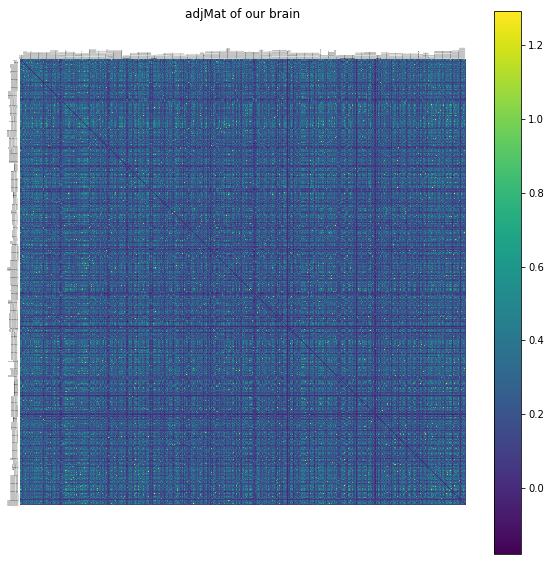

In [6]:
fig, _ = mm.plot_strength_matrix(a, title="adjMat of our brain")

In [7]:
# Closing
plt.close(fig)

## The `plotting.connectome` module

In [38]:
from nilearn import plotting
import numpy as np
import networkx as nx
from maybrain import constants as ct
from maybrain import brain as mbt
from maybrain import resources as rr
import matplotlib.pyplot as plt

a = mbt.Brain()
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)
a.import_properties(rr.PROPERTIES_LOBES_500)
a.import_properties(rr.PROPERTIES_HEMISPHERES_500)
#a.local_thresholding(threshold_type="totalEdges", value=600)
a.apply_threshold(threshold_type="totalEdges", value=200)

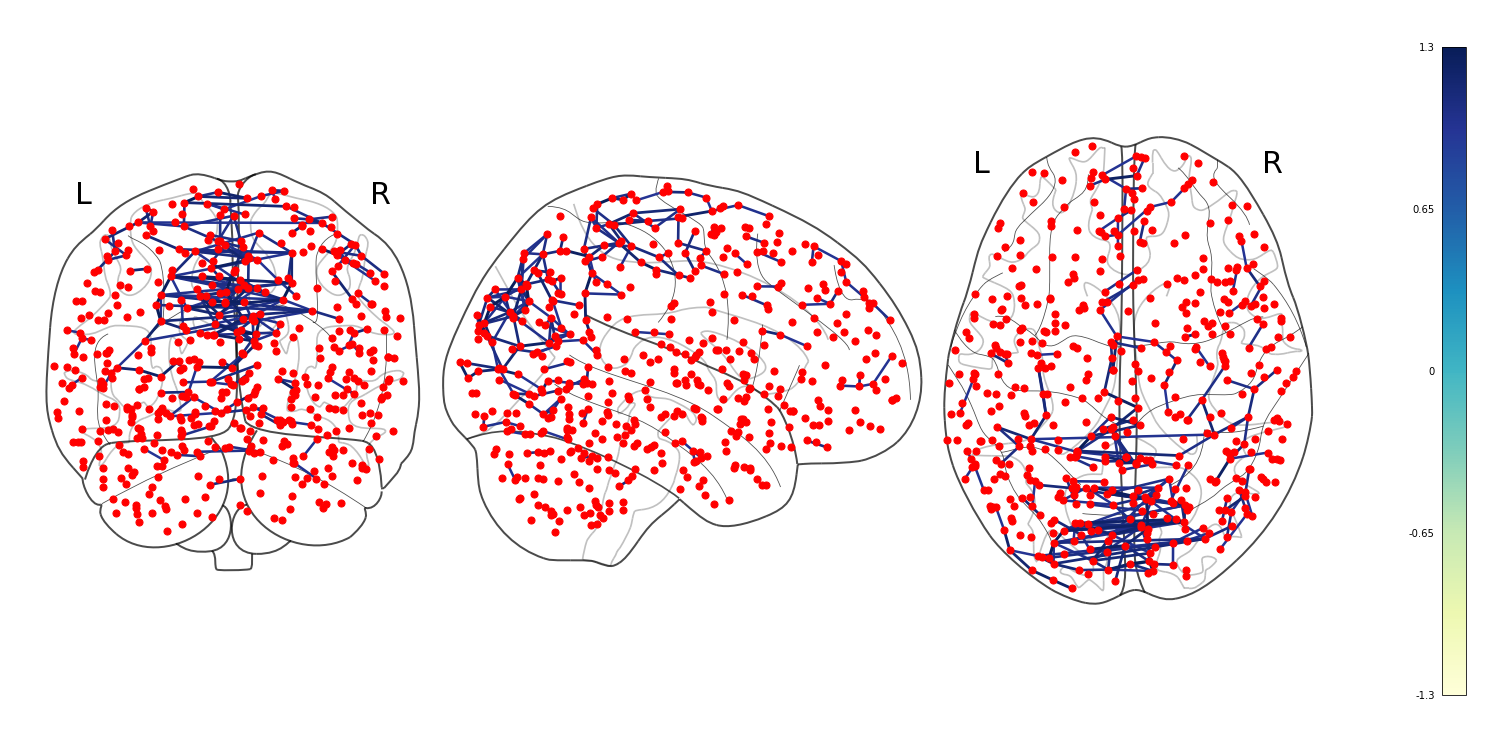

In [39]:
fig = plt.figure(figsize=(20,10))
#colours = ['b' for _ in range(500)]
#colours = []
#for _ in range(500):
#    colours.append( '#0000ff')
#print(type(colours))
display = plotting.plot_connectome(np.copy(nx.to_numpy_matrix(a.G, nonedge=0)),
                                    list(dict(a.G.nodes(data=ct.XYZ)).values()),
                         figure=fig,
                         edge_cmap=plt.get_cmap('YlGnBu'),
                         
                        node_color='red',
                        colorbar=True)
display.annotate(size=30)
#plotting.show()

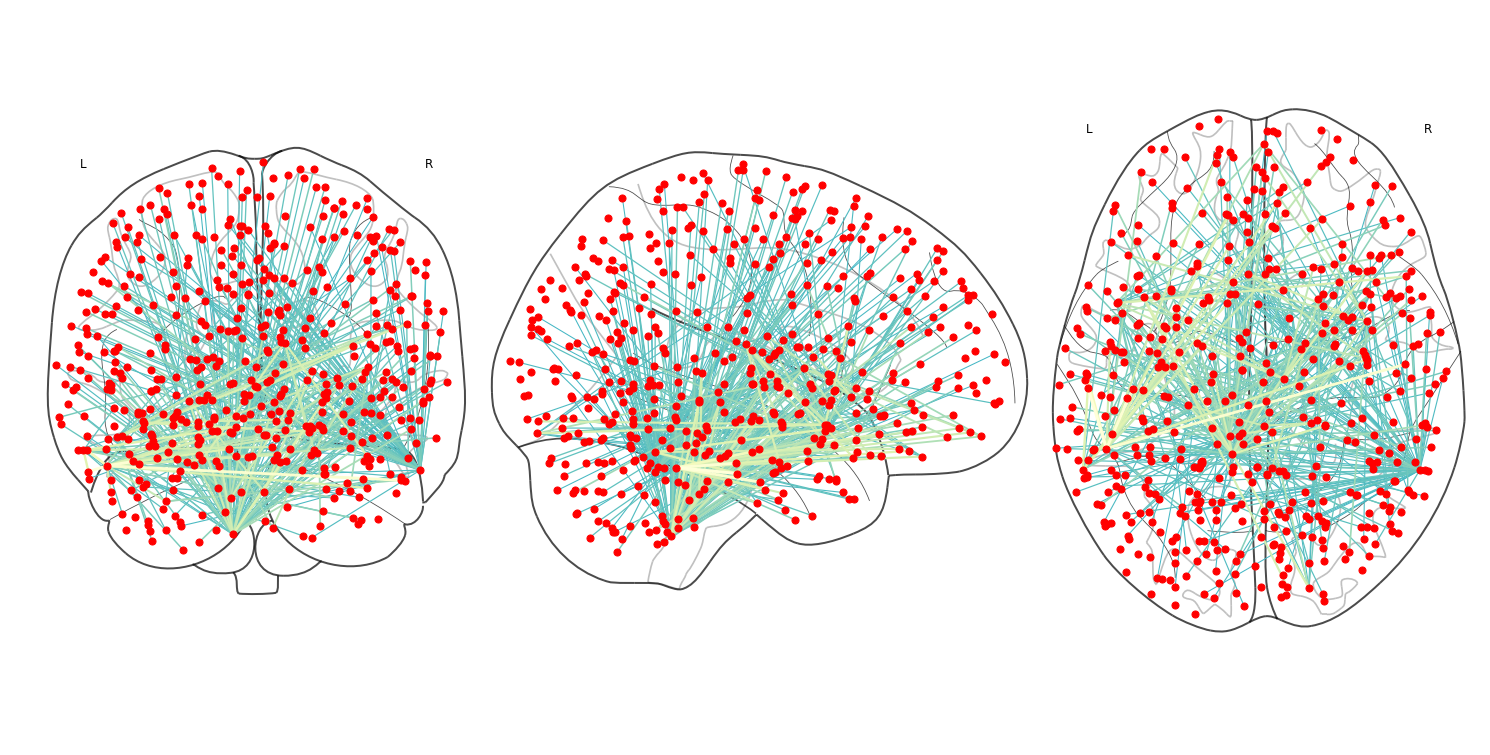

In [14]:
from maybrain.plotting import brain as pla
fig = plt.figure(figsize=(20,10))
a.local_thresholding(threshold_type="edgePC", value=0.4)
#a.binarise()
pla.plot_connectome(a, figure=fig)
fig.savefig("test.pdf")

In [40]:
import colorsys
lobes = np.array(["Parietal", "Frontal", "Temporal", "Hippocampus", "Occipital", "Cerebellum", "Cingulate", "Insula", "Subcortical"])

colors = []

for i in range(len(lobes) + 1): # +1 to account for "other" regions
    rgb = colorsys.hsv_to_rgb(i / len(lobes) + 1, 1.0, 1.0)
    colors.append('#%02x%02x%02x' % tuple([(round(255*x)) for x in rgb]))
    
print(colors)

['#ff0000', '#ffaa00', '#aaff00', '#00ff00', '#00ffaa', '#00aaff', '#0000ff', '#aa00ff', '#ff00aa', '#ff0000']


In [41]:
colours = []
for n in a.G.nodes(data=True):
    we = np.where(lobes == n[1][ct.LOBE])
    if len(we[0]) > 0:
        colours.append(colors[we[0][0]])
    else:
        colours.append(colors[-1]) # not found, so another colour
#print(colours)

CPU times: user 1.73 s, sys: 0 ns, total: 1.73 s
Wall time: 1.73 s


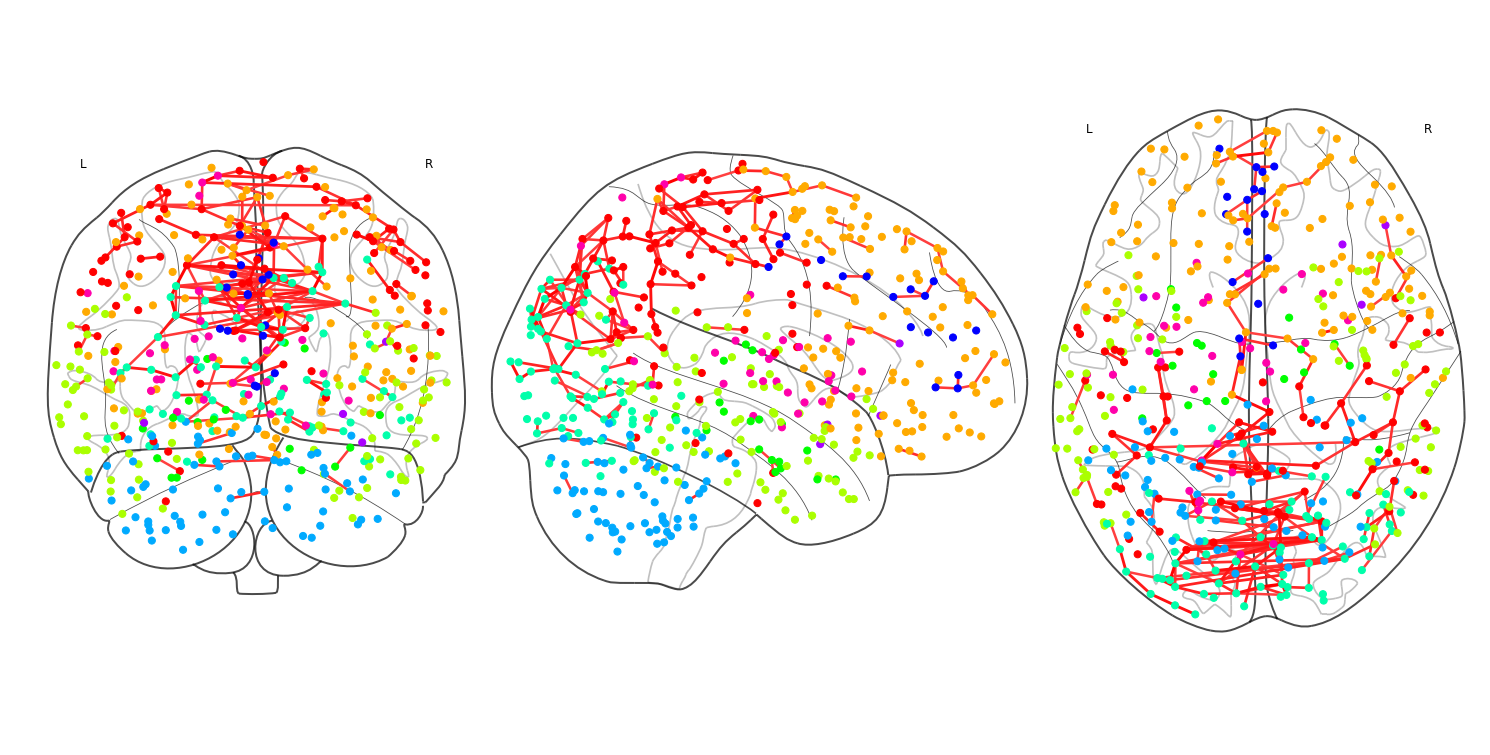

In [44]:
%%time
fig = plt.figure(figsize=(20,10))
display = plotting.plot_connectome(np.copy(nx.to_numpy_matrix(a.G, nonedge=0)), 
                         list(dict(a.G.nodes(data=ct.XYZ)).values()), 
                         figure=fig,
                        #node_kwargs={"label": colours},
                        node_color=colours#,
                        #node_size=[100 if i % 2 == 0 else 25 for i in range(500)]
                         #display_mode='lyrz'
                        )
#d.axes.legend()
#fig.legend()
#fig.legend((0,1), ('asd', 'asdddd'), 'upper left')

(-53.6, -62.8, 36.64)


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

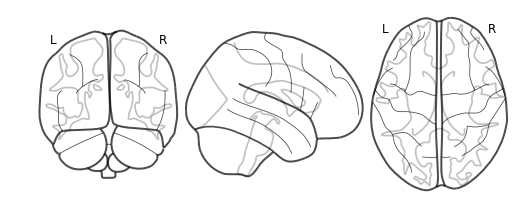

In [67]:
import matplotlib
#display = plotting.plot_connectome(np.copy(nx.to_numpy_matrix(a.G, nonedge=0)), 
#                         list(dict(a.G.nodes(data=ct.XYZ)).values()), 
#                        node_color=colours
#                        )
display = plotting.plot_glass_brain(None,
                               display_mode='ortho',
                               figure=None, axes=None, title=None,
                               annotate=True,
                               black_bg=False)
marker_coords = list(dict(a.G.nodes(data=ct.XYZ)).values())
#node_color = matplotlib.cm.Set2(np.linspace(0, 1, len(marker_coords)))
# labels should be the names of each node
for i in range(len(marker_coords)):
    print(marker_coords[i])
     #display.add_markers(marker_coords=[marker_coords[i]], marker_color=node_color[i], marker_size=50,
    display.add_markers(marker_coords=marker_coords)#, marker_color=colours[i], marker_size=50)
     #label="we")
plt.legend()

In [49]:
np.asarray(list(dict(a.G.nodes(data=ct.XYZ)).values()))

array([[-53.6 , -62.8 ,  36.64],
       [ 23.87,   0.31,  69.42],
       [-31.74,  60.46,  13.11],
       ..., 
       [ 39.31, -19.97,  52.01],
       [ 18.51, -67.8 ,  23.98],
       [ -4.03, -98.13,   9.2 ]])

In [152]:
am = np.copy(nx.to_numpy_matrix(a.G, nonedge=0))

In [55]:
mask = am == 0
rows = np.flatnonzero((~mask).sum(axis=1)) # to find rows where all elements are false, we can sum across columns:
cols = np.flatnonzero((~mask).sum(axis=0)) # to find columns where all elements are false, we can sum across rows:

In [63]:
tmp = np.delete(am, cols, axis=1)
tmp = np.delete(tmp, rows, axis=0)
tmp.shape

(30, 30)

In [121]:
am = np.array([[1,2,0], [2,3,0], [2,4,0]])
mask = am == 0
rows = np.flatnonzero((~mask).sum(axis=1)) # to find rows where all elements are false, we can sum across columns:
cols = np.flatnonzero((~mask).sum(axis=0))
mask

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True]], dtype=bool)

In [227]:
import colorsys
lobes = ["Parietal", "Frontal", "Temporal", "Hippocampus", "Occipital", "Cerebellum"]


for i in range(len(lobes)):
    rgb = colorsys.hsv_to_rgb(i / len(lobes), 1.0, 1.0)
    print(i, [round(255*x) for x in rgb])

0 [255, 0, 0]


In [228]:
#lobes = ["Parietal", "Frontal", "Temporal", "Hippocampus", "Occipital"]
#len(lobes)

5

In [244]:
str(0)

'0'